In [8]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import category_encoders as ce


In [12]:
#import dataset Rating.csv

df = pd.read_csv(r"Rating.csv")
print('Dimension of dataset= ', df.shape)

Dimension of dataset=  (7813727, 4)


In [14]:
## replace -1 with NaN values
df=df.replace(-1, np.nan)

In [15]:
df

,Unnamed: 0,user_id,teleplay_id,rating
0,0,1,20,NaN
1,1,1,24,NaN
2,2,1,79,NaN
3,3,1,226,NaN
4,4,1,241,NaN
...,...,...,...,...
7813722,7813722,73515,16512,7.0
7813723,7813723,73515,17187,9.0
7813724,7813724,73515,22145,10.0
7813725,7813725,73516,790,9.0


In [17]:
#import dataset Teleplay.csv

dftele = pd.read_csv(r"Teleplay.csv")
print('Dimension of dataset= ', dftele.shape)

Dimension of dataset=  (10204, 7)


In [18]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
obj = preprocessing.LabelEncoder()

In [19]:
# Encode labels in column 'type'.
dftele['encoded']= obj.fit_transform(dftele['type'].astype(str))  
dftele['encoded'].unique()

array([3, 4, 6, 2, 0, 1, 5])

In [20]:
dftele['type'].unique()

array(['long', 'medium', 'short', 'Special', 'Music', 'ONA', nan],
      dtype=object)

In [21]:
dftele

,teleplay_id,name,genre,type,episodes,rating,members,encoded
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",long,1,9.37,200630,3
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.25,114262,4
2,9253,Steins;Gate,"Sci-Fi, Thriller",medium,24,9.17,673572,4
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.16,151266,4
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",medium,10,9.15,93351,4
...,...,...,...,...,...,...,...,...
10199,9316,Toushindai My Lover: Minami tai Mecha-Minami,Restricted,short,1,4.15,211,6
10200,5543,Under World,Restricted,short,1,4.28,183,6
10201,5621,Violence Gekiga David no Hoshi,Restricted,short,4,4.88,219,6
10202,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Restricted,short,1,4.98,175,6


In [22]:
##see all the keys, no need in mapreduce, only for refernce
import csv

teleplays=[]

with open(r"Rating.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    headers = next(csv_reader)

    for lines in csv_reader:
        #print(lines[2])
        teleplays.append(lines[2])
#print(teleplays)
    
ints_list2 = list(dict.fromkeys(teleplays))
#print(ints_list2)

f1=open("file1.txt", "w")       #####saves the list into a text file, better than printing the list out
with f1 as output:
    output.write(str(ints_list2))
f1.close()

In [23]:
#how many keys are there
print(len(ints_list2))

11200


In [24]:
##mapper function

mydict = {}

fr=open(r"Rating.csv")
reader = csv.reader(fr)
headers = next(reader)

for rows in reader:
    k = int(rows[2])
    v = int(rows[3])
#     mydict[k] = v
    if not k in mydict:
        mydict[k] = []
    
    if(v>-1):
#         mydict[k].append(0)
#     else:
        mydict[k].append(int(v))
fr.close()
#print (mydict)

f2=open("file2.txt", "w")    #####saves the dictionary into a text file, better than printing the list out
with f2 as output:
    output.write(str(mydict))
f2.close()

In [25]:
###reducer function

import statistics

mydictsecond={}

for k in mydict:
    
    if(len(mydict[k]) != 0):    
        p=statistics.mean(mydict[k])
        mydictsecond[k] = p

f3=open("file3.txt", "w")       #####saves the dictionary into a text file, better than printing the list out
with f3 as output:
    output.write(str(mydictsecond))
f3.close()


In [26]:
# Add the column of average ratings obtained from map-reduce into teleplay.csv.

dftele['AvgMapReduced'] = dftele['teleplay_id'].map(mydictsecond)

In [27]:
dftele   ### extra column added after finding avg rating from map reduce

,teleplay_id,name,genre,type,episodes,rating,members,encoded,AvgMapReduced
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",long,1,9.37,200630,3,9.426313
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.25,114262,4,9.449495
2,9253,Steins;Gate,"Sci-Fi, Thriller",medium,24,9.17,673572,4,9.261326
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.16,151266,4,9.272552
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",medium,10,9.15,93351,4,9.171484
...,...,...,...,...,...,...,...,...,...
10199,9316,Toushindai My Lover: Minami tai Mecha-Minami,Restricted,short,1,4.15,211,6,4.000000
10200,5543,Under World,Restricted,short,1,4.28,183,6,2.500000
10201,5621,Violence Gekiga David no Hoshi,Restricted,short,4,4.88,219,6,6.000000
10202,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Restricted,short,1,4.98,175,6,4.000000


In [28]:
#import dataset Teleplay.csv

dftele = pd.read_csv(r"Teleplay.csv")
print('Dimension of dataset= ', dftele.shape)
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
obj = preprocessing.LabelEncoder()
# Encode labels in column 'type'.
dftele['encoded']= obj.fit_transform(dftele['type'].astype(str))  
dftele['encoded'].unique()

####replace unkown values by 0
dftele['episodes'] = dftele['episodes'].replace('Unknown', 0)

####replace NaN values by 0
dftele['rating'] = dftele['rating'].replace(np.nan, 0)

####replace NaN values by 0
dftele['members'] = dftele['members'].replace(np.nan, 0)

#####concert string type to integers
dftele["episodes"] = pd.to_numeric(dftele["episodes"])

dftele.loc[dftele['episodes'] == 0]   ##just to see which teleplays have 0 episodes, can ignore

min_max_scaler = preprocessing.MinMaxScaler()
dftele["episodes"], dftele["members"] = min_max_scaler.fit_transform(dftele[["episodes", "members"]]).T.tolist()

##Load dataset for Neural network
X = dftele[['episodes','members']]
y = dftele[['rating']]
xaxis=dftele[['teleplay_id']]

Dimension of dataset=  (10204, 7)


In [30]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = dftele[['episodes', 'members']]
y = dftele[['rating']]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 0)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 2))        ##2 input features, 32 neurons in the first hidden layer

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'relu'))              ##16 neurons in the first hidden layer

# Adding the third hidden layer
model.add(Dense(units = 8, activation = 'relu'))               ##16 neurons in the first hidden layer

# Adding the output layer

model.add(Dense(units = 1))                                      ##1 neuron in putput layer

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer=keras.optimizers.SGD(0.001),          ##use stochastic gradient descent to minimise loss fucntion, loss fucntion=MSE
                  loss=keras.losses.MeanSquaredError(),
                  metrics=["mse"])
#model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, epochs=10, validation_split=0.2)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print(mse)

Epoch 1/10


C:\Users\sweta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.9823 - mse: 25.9823 - val_loss: 2.0686 - val_mse: 2.0686
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0548 - mse: 2.0548 - val_loss: 1.8047 - val_mse: 1.8047
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7428 - mse: 1.7428 - val_loss: 1.6591 - val_mse: 1.6591
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5700 - mse: 1.5700 - val_loss: 1.5638 - val_mse: 1.5638
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6439 - mse: 1.6439 - val_loss: 1.5083 - val_mse: 1.5083
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4326 - mse: 1.4326 - val_loss: 1.4599 - val_mse: 1.4599
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4531 - mse: 1.4531 - val_loss: 1.4340 - val_mse: 1.4340
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3794 - mse: 1.3794 - val_loss: 1.4178 - val_mse: 1.4178
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.414

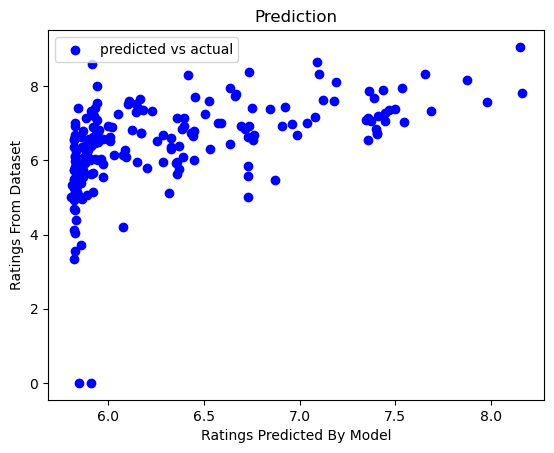

In [31]:
#########plot
plt.scatter(y_pred, y_test, color = 'blue', label='predicted vs actual')
plt.ylabel('Ratings From Dataset')
plt.xlabel('Ratings Predicted By Model')

plt.title('Prediction')
plt.legend()
plt.show()

In [33]:
#import dataset New_Teleplay.csv

dfnew = pd.read_csv(r"New_Teleplay.csv")

print('Dimension of dataset= ', dfnew.shape)
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
obj = preprocessing.LabelEncoder()
# Encode labels in column 'type'.
dfnew['encoded']= obj.fit_transform(dfnew['type'].astype(str))  
dfnew['encoded'].unique()

####replace unkown values by 0
dfnew['episodes'] = dfnew['episodes'].replace('Unknown', 0)

# ####replace NaN values by 0
# dfnew['rating'] = dfnew['rating'].replace(np.nan, 0)

####replace NaN values by 0
dfnew['members'] = dfnew['members'].replace(np.nan, 0)

#####concert string type to integers
dfnew["episodes"] = pd.to_numeric(dfnew["episodes"])

dfnew.loc[dfnew['episodes'] == 0]   ##just to see which teleplays have 0 episodes, can ignore

# process column episodes and members
min_max_scaler = preprocessing.MinMaxScaler()
dfnew["episodes"], dfnew["members"] = min_max_scaler.fit_transform(dfnew[["episodes", "members"]]).T.tolist()
##Load dataset for Neural network
Xnew = dfnew[['episodes','members']]
#y = dftele[['rating']]
#xaxis=dftele[['teleplay_id']]

Dimension of dataset=  (2090, 7)


In [34]:
ynew = model.predict(Xnew)
dfnew['rating'] = ynew

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
dfnew

,teleplay_id,name,genre,type,episodes,rating,members,encoded
0,9345,Gakkou no Kowai Uwasa Shin: Hanako-san ga Kita!!,"Comedy, Horror, School, Supernatural",medium,0.025268,6.811465,0.000415,4
1,1793,Kaze no Na wa Amnesia,"Action, Dementia, Drama, Sci-Fi",long,0.000766,6.813490,0.010355,3
2,33909,Marine Dreamin&#039;,Music,Music,0.000766,6.789824,0.000144,0
3,10585,Chuunen Punk,Music,Music,0.000766,6.790356,0.000373,0
4,28993,Hand Soap,"Dementia, Psychological",long,0.000766,6.790176,0.000295,3
...,...,...,...,...,...,...,...,...
2085,3531,Shinjin Tour Conductor,Restricted,short,0.000766,6.791974,0.001071,6
2086,795,Oniisama e...,"Drama, School, Shoujo, Shoujo Ai",medium,0.029862,6.847768,0.014379,4
2087,29995,The Embryo Develops into a Fetus,Dementia,ONA,0.000766,6.791579,0.000901,1
2088,9973,Xi Yang Yang Yu Hui Tai Lang: Zhi Hu Hu Sheng Wei,"Adventure, Comedy, Kids",long,0.000766,6.789874,0.000165,3


In [36]:
dfnew.to_csv (r'18080395d_Task1.csv', index = False, header=True)


In [37]:
####ignore this, just for justificaton in video
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    mse = mean_squared_error(prediction, y_test)
    return mse
linear_regression(X, y)

1.5958148941056156